In [129]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import numpy as np
a4_dims = (20, 10)

In [2]:
df = pd.read_csv("./call_dataset.csv")

In [83]:
data = df

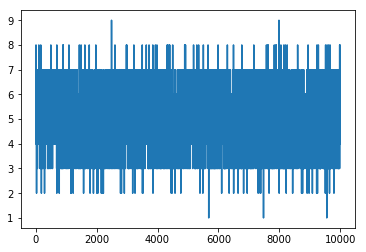

In [4]:
plt.plot(df['Duration of calls'])

In [6]:
df['Duration of calls'].value_counts()

5    3860
6    2620
4    2213
7     646
3     542
8      61
2      53
1       3
9       2
Name: Duration of calls, dtype: int64

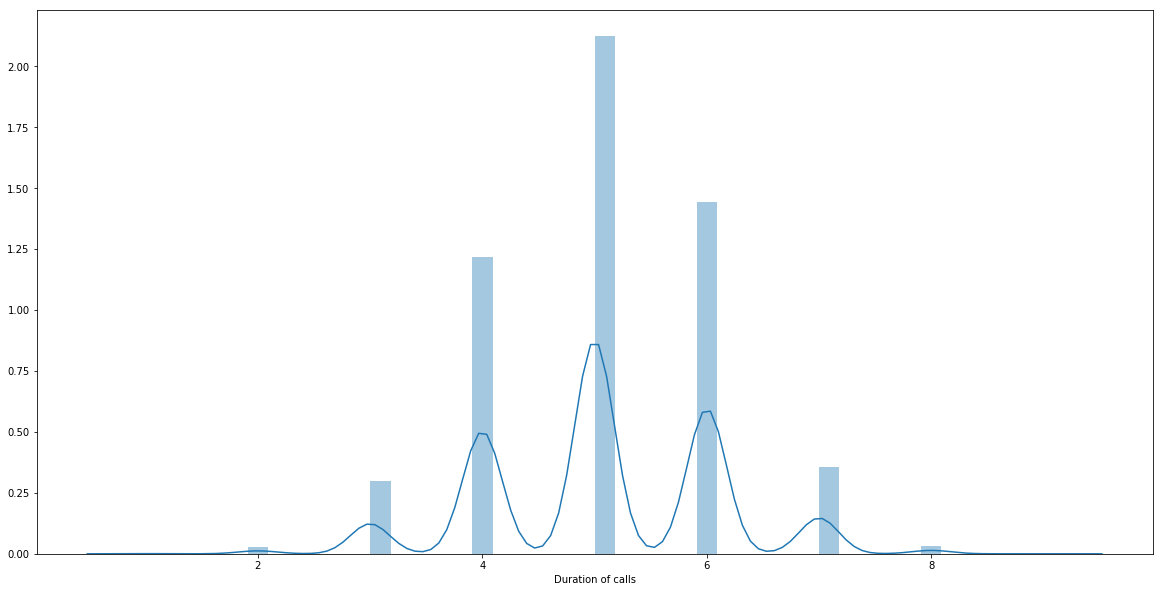

In [19]:
fig, ax = plt.subplots(figsize=a4_dims)
sns.distplot(df['Duration of calls'])

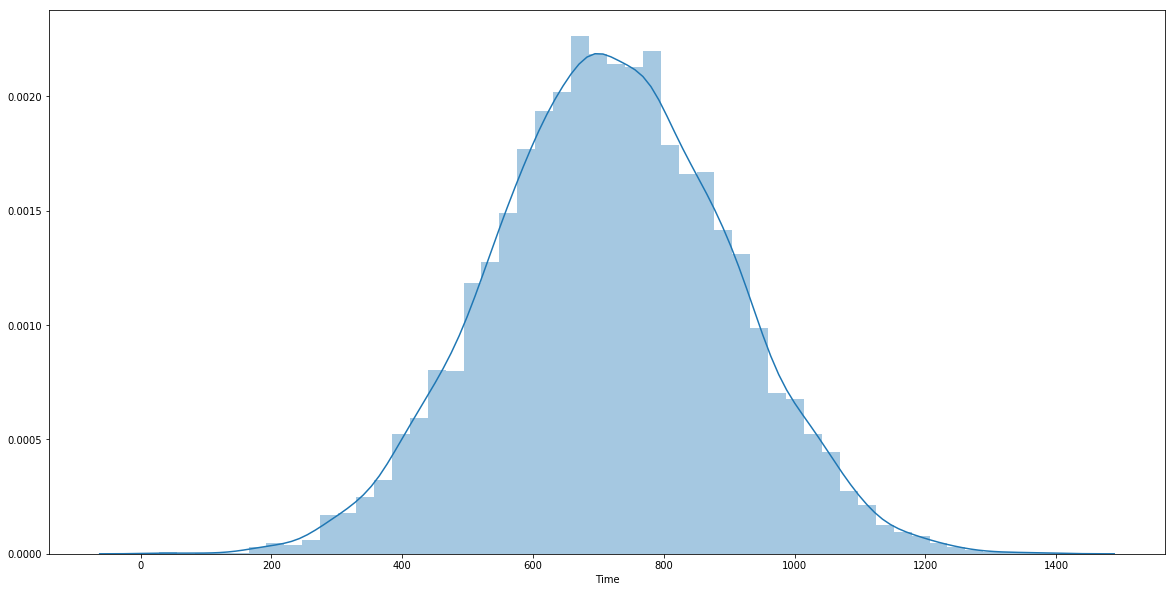

In [26]:
fig, ax = plt.subplots(figsize=a4_dims)
sns.distplot(df['Time'])

In [21]:
df.columns

Index(['Call', 'Time', 'Duration of calls'], dtype='object')

In [24]:
df['Call'].value_counts()

2047    1
5424    1
1338    1
7481    1
5432    1
       ..
2716    1
8857    1
4759    1
6806    1
2049    1
Name: Call, Length: 10000, dtype: int64

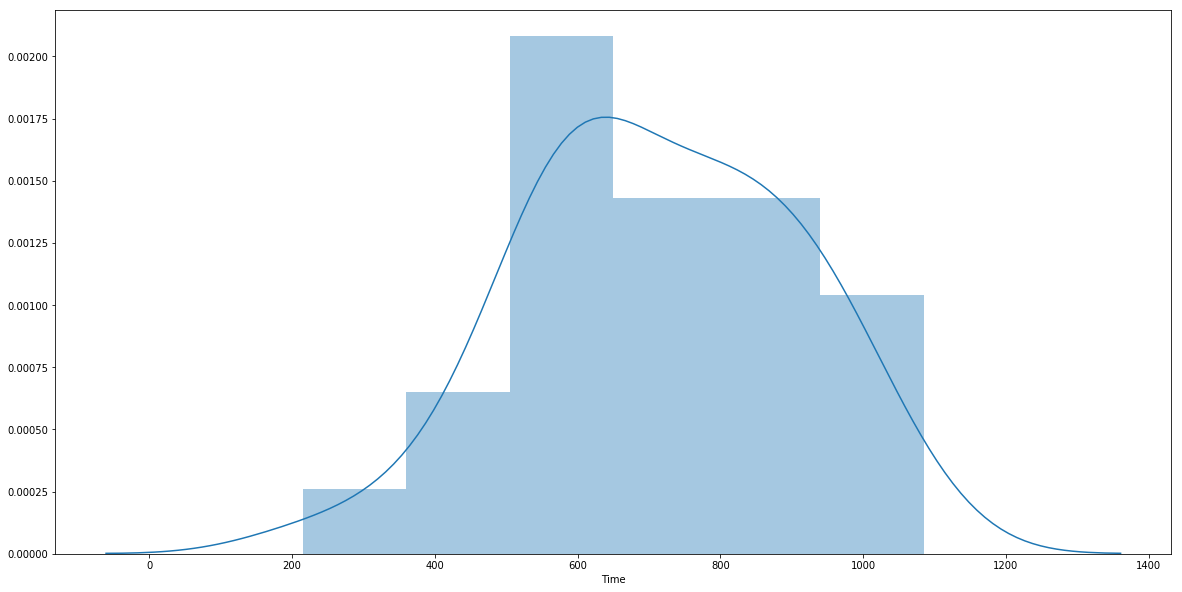

In [32]:
fig, ax = plt.subplots(figsize=a4_dims)
sns.distplot(df[df['Duration of calls']==2]['Time'])

In [35]:
df['Duration of calls'].sum()

50635

In [41]:
x = np.repeat(0,7)

In [42]:
df['Time'][0]-x

array([28, 28, 28, 28, 28, 28, 28])

In [89]:
agents = range(100)
waittime = list(np.zeros(100))

In [124]:
for number_of_callers in range(100):
    caller = np.repeat(0,number_of_callers+1)
    index = [i for i in range(0,number_of_callers+1)]
    caller_diff = np.repeat(0,number_of_callers+1)
    data['assigned'] = [1 for i in range(10000)]
    data['waittime'] = [0 for i in range(10000)]
    for i in range(len(data['Call'])):
        caller_diff = data['Time'][i]-caller
        best_caller_diff = max(caller_diff)
        l = caller_diff == best_caller_diff
        z = [index[i] for i in range(len(l)) if l[i]==True]
        index1 = index[min(z)]
        data['assigned'][i] =  index1
        data['waittime'][i] = max(-best_caller_diff,0)
        caller[index1] = caller[index1] + data['Duration of calls'][i]
    waittime[number_of_callers] = max(data['waittime'])

In [126]:
len(waittime)

100

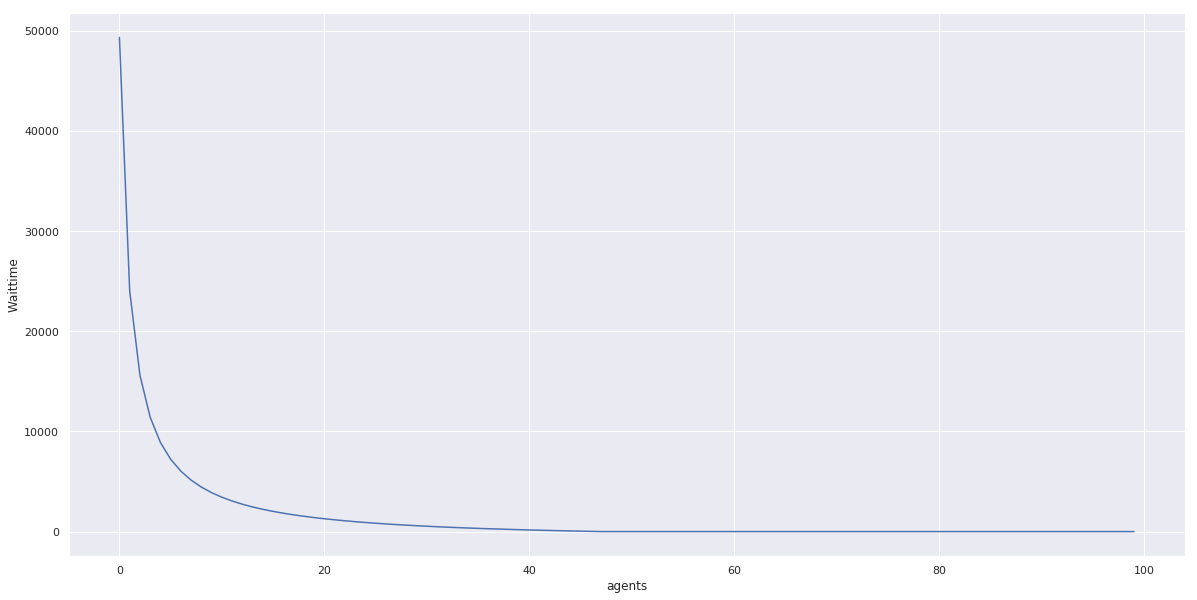

In [132]:
fig, ax = plt.subplots(figsize=a4_dims)
ax.set(xlabel='agents',ylabel='Waittime')
sns.lineplot(x=agents,y=waittime)